Author: Adrian Swartz<br>
Date: 3/29/2019


# Solutions to Andew Ng's coursera problems
## Example 7b: Principal Component Analysis

Andrew Ng's course is designed for the solutions to be worked through in Octave (similar to matlab). However, I am going to do these problems in python (within a jupyter notebook) and demonstrate how various approaches can be implemented in python.

In this exercise, we are tasked implementing principal component analysis (PCA) to perform dimensionality reduction. First experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

This notebook is structured as follows:<br>

[Part 1 - Implementing Principal Component Analysis](#pt1)<br>
1. [Exploratory Data Analysis](#eda)
2. [Implementing PCA manually](#imp)
3. [PCA with sklearn](#sklearn)

[Part 2 - Image Compression with PCA](#pt2)<br>

***

For this exercise, we will import several python packages: NumPy (numerical python for matrix manupulations and advanced math), pandas (DataFrames offer a useful platform for importing data and performing exploratory data analysis), matplotlib and seaborn for data visualization.

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
cp=sns.color_palette()

# import a few special packages we'll use for this example
from scipy.io import loadmat
from sklearn.decomposition import PCA

<a id="pt1"></a>
# Part 1 - Implementing Principal Component Analysis

Prompt:<br>
In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works.

First start with a 2D dataset which has one direction of large variation and one of smaller variation.



***

<a id="eda"></a>
# Exploratory Data Analysis


In [2]:
raw_data = loadmat('ex7/ex7data1.mat')
data = pd.DataFrame(raw_data['X'], columns = ['X1','X2'])
X = raw_data['X']
data.head()

,X1,X2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
X1    50 non-null float64
X2    50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,50.0,3.989265,1.173050,1.180233,3.051136,3.963505,4.891286,5.911298
X2,50.0,5.002806,1.023408,2.878694,4.418211,5.012886,5.810504,7.363197


In [5]:
data.corr()

,X1,X2
X1,1.00000,0.73553
X2,0.73553,1.00000


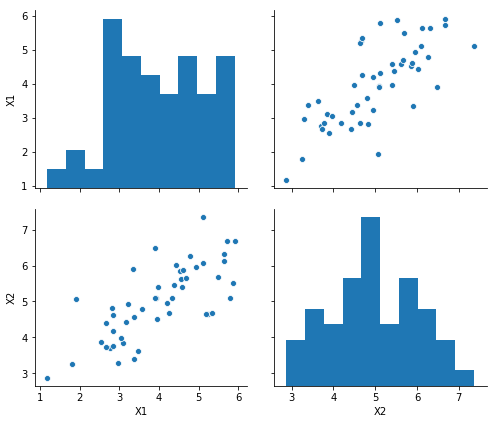

In [6]:
sns.pairplot(data, height=3, aspect=1.2)

<a id="imp"></a>
# Implementing PCA

PCA consists of two computational steps: First, you compute the covariance matrix of the data. Then, you use SVD to compute the eigenvectors $U1, U2, . . . , Un$. These will correspond to the principal components of variation in the data. Before using PCA, it is important to first normalize the data by __subtracting the mean value of each feature__ from the dataset, and scaling each dimension so that they are in the same range.

In [7]:
X.mean(), np.mean(X, axis=0)

(4.496035565920988, array([3.98926528, 5.00280585]))

In [8]:
def pca(X):
    #normalize according to the mean and divide by the variance
    Xn = (X - np.mean(X, axis=0))/np.std(X,axis=0)
    
    m, n = Xn.shape
    
    #covariance matrix
    Xn = np.matrix(Xn)
    C = (Xn.T * Xn) / m
    
    U, S, V = np.linalg.svd(C)
    
    return U, S, V

In [9]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.70710678, -0.70710678],
         [-0.70710678,  0.70710678]]),
 array([1.73553038, 0.26446962]),
 matrix([[-0.70710678, -0.70710678],
         [-0.70710678,  0.70710678]]))

In [10]:
def project_data(X, U, k):
    Ured=U[:,:k]
    
    return np.dot(X, Ured) #np.multiply(Ured.T,X)

project_data(X, U, 1).shape

(50, 1)

In [11]:
Z = project_data(X, U, 1)
Z[:10]

matrix([[-4.78759045],
        [-7.34122042],
        [-4.99760204],
        [-4.58251038],
        [-4.96535088],
        [-7.33909864],
        [-5.02657745],
        [-8.90393595],
        [-6.38329374],
        [-7.20197778]])

We can also try to recover the data

In [12]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

X_recovered = recover_data(Z, U, 1)
X_recovered=np.array(X_recovered)

In [13]:
Xn = (X - np.mean(X, axis=0))/np.std(X,axis=0)
Xr = (X_recovered-np.mean(X, axis=0))/np.std(X, axis=0)

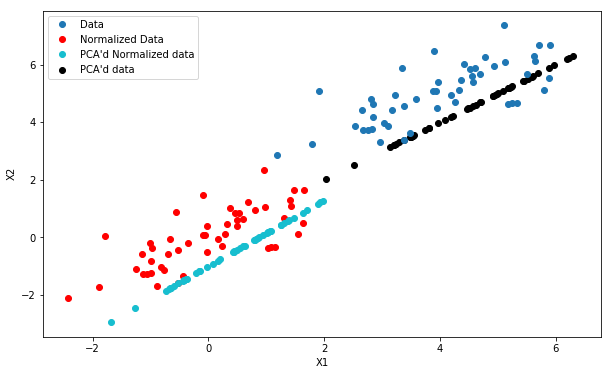

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(X[:,0],X[:,1],'o', label='Data')
plt.plot(Xn[:,0],Xn[:,1],'o',color='red', label='Normalized Data')
plt.plot(Xr[:,0],Xr[:,1],'o',color=cp[9], label="PCA'd Normalized data")
plt.scatter(X_recovered[:,0],X_recovered[:,1], color='black', label="PCA'd data")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()

The offset is a feature of plotting a reduced data set which has a particular principal axis on the X1, X2 axis. It doesn't really make sense to plot on the same X1,X2 plot.

<a id="sklearn"></a>
# PCA with sklearn

You might be shocked to discover that sklearn has a module called [sklearn.deconstruction](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) that includes PCA. 

PCA has a number of methods:


        fit(X[, y])    # Fit the model with X.
        fit_transform(X[, y])	# Fit the model with X and apply the dimensionality reduction on X.
        get_covariance()	# Compute data covariance with the generative model.
        get_params([deep])	# Get parameters for this estimator.
        get_precision()	# Compute data precision matrix with the generative model.
        inverse_transform(X)	# Transform data back to its original space.
        score(X[, y])	# Return the average log-likelihood of all samples.
        score_samples(X)	# Return the log-likelihood of each sample.
        set_params(**params)	# Set the parameters of this estimator.
        transform(X)	# Apply dimensionality reduction to X.

In [15]:
PCA = PCA(n_components=1).fit(X)

In [16]:
X_r = PCA.transform(X)

In [17]:
X_r.shape

(50, 1)

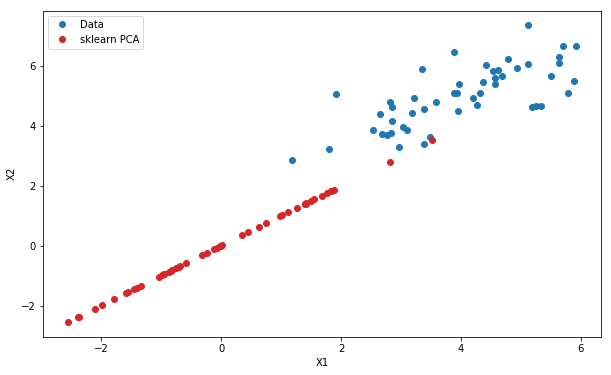

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(X[:,0],X[:,1],'o', label='Data')
plt.plot(X_r[:,0],X_r,'o',color=cp[3], label='sklearn PCA')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()

Again, it's weird to plot it this way on a 2D graph in units of X1 and X2 when PCA finds the principal components. Id doesn't make sense to plot it on X1, X2 except to visualize the straight line. But really we should think of the data as belonging to a new principal axis with one dimension.

The pca object will also provide a number of useful attributes including `components_` which are the principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by `explained_variance_`.

In [20]:
PCA.components_

array([[-0.76908153, -0.63915068]])

In [21]:
PCA.explained_variance_ratio_

array([0.87062385])

`pca.explained_variance_ratio_`: array, shape (n_components,)

Percentage of variance explained by each of the selected components.

If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

<a id="pt2"></a>
# Part 2 - Image Compression with PCA


In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction.

The dataset `ex7faces.mat` contains face images, each 32 $\times$ 32 in grayscale. Each row of $X$ corresponds to one face image (a row vector of length 1024).

In [22]:
faces = loadmat('ex7/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

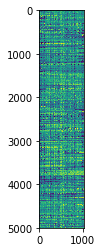

In [23]:
plt.imshow(X)

An image should be 32x32 pixels. So let's see if we can reshape X and plot one face at random

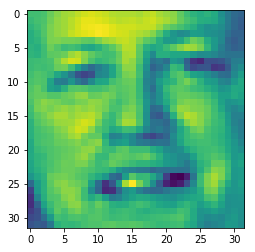

In [24]:
face = np.reshape(X[np.random.randint(0,99),:], (32, 32)).T
plt.imshow(face)

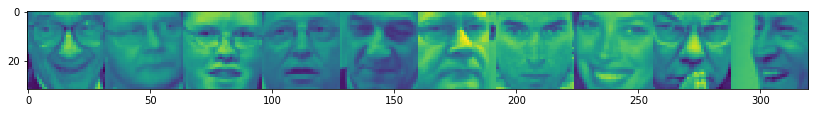

In [25]:
stacked_faces = np.reshape(X[0,:], (32, 32)).T
for i in range(1,10):
    stacked_faces = np.hstack((stacked_faces,np.reshape(X[i,:], (32, 32)).T))
fix, ax = plt.subplots(figsize=(14,5))
plt.imshow(stacked_faces)

In [26]:
stacked_faces.shape

(32, 320)

__Let's begin PCA__

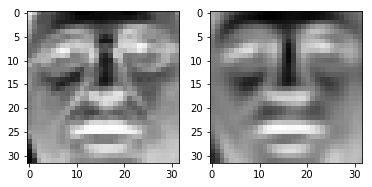

In [27]:
U, S, V = pca(X)
PR = 100    #start with 100 principle components
Z = project_data(X, U, PR) 

X_recovered = recover_data(Z, U, PR)
face_reduced = np.reshape(X_recovered[3,:], (32, 32))

face = np.reshape(X[3,:], (32, 32)).T

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(face, cmap='Greys')
ax2.imshow(face_reduced.T, cmap='Greys')

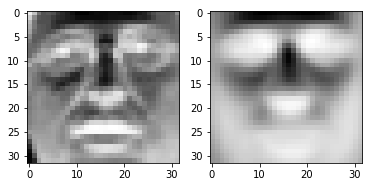

In [28]:
U, S, V = pca(X)
PR = 10       # 10 principle components
Z = project_data(X, U, PR) 

X_recovered = recover_data(Z, U, PR)
face_reduced = np.reshape(X_recovered[3,:], (32, 32))

face = np.reshape(X[3,:], (32, 32)).T

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(face, cmap='Greys')
ax2.imshow(face_reduced.T, cmap='Greys')

Done! On to recommender systems and anomaly detection.